Give the Poisson process, i.e. the first order differential equation that
results in P0(τ ), the probability that τ days after card purchase the card
has not been used yet.

The probability $P(0; \tau)$ of the card not being used at time $\tau$ gives us

$$
\frac{\partial}{\partial \tau} P(0,\tau) = -p(\tau) P(0,\tau)
$$

so

$$
\int \frac{1}{P(0,\tau)}\frac{\partial}{\partial \tau} P(0,\tau) \partial \tau = \int -p(\tau) \partial \tau
$$

$$
\begin{aligned}
\Rightarrow \log{(P(0,\tau))} &= \int_{0}^{\tau}-p(\tau) \partial\tau\\
P(0,\tau) &= e^{\int_{0}^{\tau}-p(\tau) \partial\tau}\\
\end{aligned}
$$


Give the Poisson process, i.e. the first order differential equation that
results in Q0(τ ), the probability that τ days after card purchase the card
has not been lost yet.



$$
\frac{\partial}{\partial \tau} Q(0,T) = -q Q(0,\tau)
$$

so

$$
\int \frac{1}{Q(0,\tau)}\frac{\partial}{\partial \tau} P(0,\tau) \partial \tau = \int -q \partial \tau
$$

$$
\begin{aligned}
\Rightarrow \log{(Q(0,\tau))} &= \left[-q\tau + C_0\right]_{0}^{\tau}\\
Q(0,\tau) &= e^{-q\tau}\\
\end{aligned}
$$


Work out P(τ ) to arrive at
P(τ ) = pe
−qτ−
p
q (1−e
−qτ )


given $p(\tau) = pe^{-q\tau}$

$$
\begin{aligned}
P(\tau) &= p(\tau)e^{-\int_{0}^{\tau}p(s)\partial s}\\
&= pe^{-q\tau}e^{-\int_{0}^{\tau}pe^{-qs}\partial s}\\
&= pe^{-q\tau}e^{\left[ \frac{p}{q} e^{-qs} \right]_{0}^{\tau}} \\
&= pe^{-q\tau}e^{\frac{p}{q} e^{-q\tau} - \frac{p}{q}} \\
&= pe^{-q\tau - \frac{p}{q} \left(1 - e^{-q\tau}\right)}\\
\end{aligned}
$$

Derive equation 4

The probability of a card bought at $t_0$ and used at $t_1$ is the probability of being used in the time interval $\tau = t_1 - t_0$ - the probability of not being used

$$
\begin{aligned}
P(1,\tau) &= pe^{-q\tau} - pe^{-q\tau - \frac{p}{q} \left(1 - e^{-q\tau}\right)}\\
&= pe^{-q\tau}\left(1 - e^{- \frac{p}{q} \left(1 - e^{-q\tau}\right)}\right)\\
\Rightarrow Norm(\tau) &= 1 - e^{- \frac{p}{q} \left(1 - e^{-q\tau}\right)}\\
\end{aligned}
$$

Derive equation 5

$$
\begin{aligned}
P(0,\tau) &= 1 - Norm(\tau) \\
&= e^{- \frac{p}{q} \left(1 - e^{-q\tau}\right)} \\
\end{aligned}
$$

Read in the provided dataset and split it into two, one of cards that have
been used, and one of cards that have not been used yet. You are allowed to
express purchase and use days as the number of days since 3-3-2013 to avoid
working with datetimes. (fuck datetimes)

In [49]:
%matplotlib inline

import scipy.constants
import numpy as np
import matplotlib.pyplot as plt
import math
import csv
import scipy as sp
from scipy.optimize import minimize
from matplotlib.patches import Ellipse
from datetime import date

In [81]:
reader = csv.reader(open('tentamen_data.csv'));

t0 = date(2013,3,3)
t1 = date(2014,4,7)

# Read data
skippedHeader = False
used = []
unused = []
avg_used = 0

for entry in reader:
    if not skippedHeader:
        skippedHeader = True
        continue
    purchased_date = date(int(entry[0][0:4]),int(entry[0][5:7]),int(entry[0][8:10]))
    if entry[1]:
        used_date = date(int(entry[1][0:4]),int(entry[1][5:7]),int(entry[1][8:10]))
        #this is a hack to avoid card purchased and spent on the same day
        #minimum 1 day existence for a card
        used.append({'purchased' : (purchased_date - t0).days, 'used' : (used_date - t0).days + 1})
        avg_used += (used_date - t0).days + 1 - (purchased_date - t0).days
    else:
        unused.append({'purchased' : (purchased_date - t0).days})

avg_used /= len(used)
print avg_used
# for entry in unused:
#     print entry['purchased']


23


In [51]:
# for entry in used:
#     print entry

Explain why the normalization factor is needed in equation 6.

**just a guess - think about this again**
The normalization is needed because not all the time deltas will be the same so we need to normalize with respect to the evidence

For the used cards minimize the log-likelihood of equation 7 to obtain your
estimate of q and p.

In [52]:
def n(p,q):
    return 1 - math.exp((-p / q) * (1 - math.exp(-q * (t1 - t0).days)))

def P(p,q,tau):
    return p * math.exp(-q*tau - (p/q) * (1 - math.exp(-q * tau)))


def ll(p,q):
    L = 0
    for entry in used:
        try:
            L += math.log(P(p,q,entry['used'] - entry['purchased']) / n(p,q))#,entry['used'] - entry['purchased']))
        except:
            return float('inf')
            
    return (-2 * L)

def G(x):
    return ll(x[0],x[1])

samples = 5

p = np.linspace(0,1,samples) # range(1,10) # 
q = np.linspace(0,1,samples) # range(1,10) #

results = []
mins = []

for i in range(0,samples):
    minimized = minimize(G,[p[i],q[i]], method='Powell')
    results.append(minimized.x) # optimized parameters
    mins.append(minimized.fun) # score of the parameter

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: RuntimeWarning: invalid value encountered in double_scalars
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: RuntimeWarning: divide by zero encountered in double_scalars
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  from ipykernel import kernelapp as app


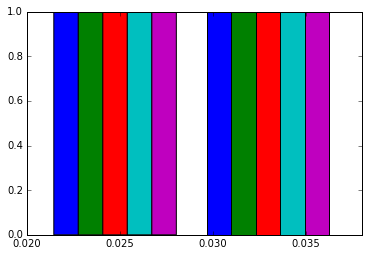

[array([ 0.02077728,  0.03702231]), array([ 0.02069022,  0.03696734]), array([ 0.02076837,  0.03700784]), array([ 0.02060772,  0.03707474]), array([ 0.02074887,  0.03699248])]


In [53]:
plt.hist(results, bins=2)
plt.show()

print results

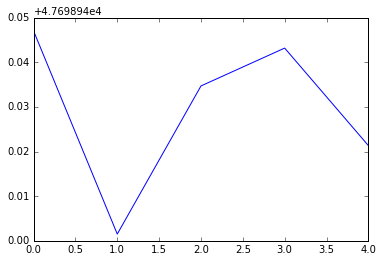

[array(47698.987015168896), array(47698.941510758144), array(47698.974691115254), array(47698.98317228243), array(47698.96133193614)]
47698.9415108


In [54]:
plt.plot(range(0, samples),mins)
plt.show()

print mins
print min(mins)

In [63]:
min_mins = min(mins)
best_params = results[mins.index(min_mins)]
avg_params = [np.mean(results[:][0][0]),np.mean(results[:][0][1])]

print "min: ", min_mins, ", ",best_params
print "avg: ", np.mean(mins), ", ", avg_params

min:  47698.9415108 ,  [ 0.02069022  0.03696734]
avg:  47698.9695443 ,  [0.020777283738091193, 0.037022310745438061]


Use your estimates of q and p to estimate how many of the unused cards
will never be used in the future, and the amount of money that can be
deducted from the balance

In [56]:
def Pn(p,q,t):
    return math.exp(-(p/q)*math.exp(-q * ((t1 - t0).days - t)))

Pnevers = []

for entry in unused:
    # entry['purchased'], 
    Pnevers.append(Pn(avg_params[0],avg_params[1],entry['purchased']))
    
    
total_unused = len(unused) * 10
print "total held: ", total_unused
print "expected spent: ", np.mean(Pnevers)*total_unused
print "expected unspent: ", total_unused*(1-np.mean(Pnevers))
 


total held:  42530
expected spent:  39412.1778761
expected unspent:  3117.82212389


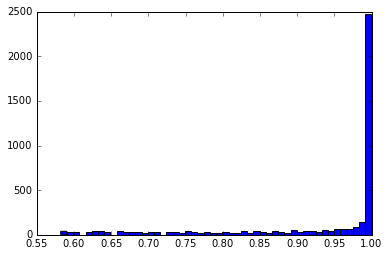

In [60]:
plt.hist(Pnevers,bins=50)
plt.show()



Write a Monte Carlo simulation that randomly generates a use day according
to P(t − t0) of equation 3 for each gift card in the entire dataset
using q0 and p0 for the model parameters.


In [ ]:
MC_sim = []

# def H()


print "used error cases: "
for entry in used:
    def H(t):
        d = np.random.rand()
        return abs(d - P(avg_params[0],avg_params[1],t))
    try:
        minimized = minimize(H, avg_used, method='Powell', bounds=(0,None))
#         print minimized.x
        MC_sim.append({'purchased' : entry['purchased'], 'used' : minimized.x})
    
    except:
        print entry

print "unused error cases: "
for entry in unused:
    def H(t):
        d = np.random.rand()
        return abs(d - P(avg_params[0],avg_params[1],t))
    try:
        minimized = minimize(H, avg_used, method='Powell', bounds=(0,None))
        MC_sim.append({'purchased' : entry['purchased'], 'used' : minimized.x})
    except:
        print entry
 

{'used': 77, 'purchased': 64}
{'used': 120, 'purchased': 99}
{'used': 249, 'purchased': 220}
{'used': 400, 'purchased': 385}
{'used': 181, 'purchased': 135}
{'used': 84, 'purchased': 65}
{'used': 201, 'purchased': 170}
{'used': 367, 'purchased': 358}
{'used': 143, 'purchased': 124}
{'used': 251, 'purchased': 228}
{'used': 269, 'purchased': 266}
{'purchased': 144}
{'purchased': 363}
{'purchased': 390}